<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Oct13-14/emcee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de MCMC Emcee

Por Isaías Hernández Lares



# Librerias

In [ ]:
!python -m pip install -U pip
!pip install -U setuptools setuptools_scm pep517
!pip install -U emcee

In [202]:
import emcee
import numpy as np
import pdb
import matplotlib.pyplot as plt

In [203]:
plt.style.use('Solarize_Light2')

# Definición de los elementos del EnsembleSampler

In [204]:
datos = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men.txt", delimiter=',')
y = datos[:, 1]
x = datos[:, 0]
x = (x-np.mean(x))/np.std(x)

In [205]:
#Hacer el objeto de EnsembleSampler con los parametros: nwalkers, ndim, log_prob, args=[]
nwalkers = 5
ndim = 2 #Parametros
theta_min = [0, -1]
theta_max = [20, 0]

In [206]:
def Log_Likelihood(theta, x, y):
  b, m = theta
  modelo = m*x + b
  likelihood = -0.5 * np.sum((y - modelo)**2)
  return likelihood

def Log_Prior(theta, theta_min, theta_max):
    b, m = theta
    if theta_min[0] < b < theta_max[0] and theta_min[1] < m < theta_max[1]:
        return 0.0
    return -np.inf

def Log_Posterior(theta, x, y, theta_min, theta_max):
  likelihood = Log_Likelihood(theta, x, y)
  prior = Log_Prior(theta, theta_min, theta_max)
  posterior = likelihood + prior
  return posterior

In [207]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, Log_Posterior, args=(x, y, theta_min, theta_max))

# Obteniendo las cadenas

In [208]:
rng = np.random.default_rng()

In [209]:
#Generando posiciones aleatorias para los caminantes
b_ini = rng.uniform(theta_min[0], theta_max[0], (nwalkers, 1))
m_ini = rng.uniform(theta_min[1], theta_max[1], (nwalkers, 1))
pos = np.hstack((b_ini, m_ini))
pos

array([[ 7.46419999, -0.58273411],
       [15.82823516, -0.34894021],
       [19.3235868 , -0.42975239],
       [16.92061821, -0.58047905],
       [15.44839008, -0.4619613 ]])

In [210]:
sampler.reset()
sampler.run_mcmc(pos, 2500, progress=True)

100%|██████████| 2500/2500 [00:02<00:00, 1208.29it/s]


State([[10.33950419 -0.27397407]
 [10.27443762 -0.28702942]
 [10.31812719 -0.29489559]
 [10.3901028  -0.36429416]
 [10.54155754 -0.46615229]], log_prob=[-1.21436861 -1.29395831 -1.14652528 -0.82065317 -0.99075788], blobs=None, random_state=('MT19937', array([1442405421, 1794097211, 4275614122,  295943465, 2329122563,
       4064980404, 2998091866, 1010604590,  149521450, 3950413207,
       2573257575,   29159889, 1012220352, 2675355469, 3600723311,
        675361376, 3246750378,  997046164, 2133421945, 2724013973,
        148473999, 3264376127, 2505340495, 1741079110, 3718900997,
        913513977, 2682411927, 3884609989, 1417168159, 4184921832,
        643575506, 3537862645, 2406485943, 3624152237, 3474010964,
       2840554454, 1685707479, 1915874217, 3326515031, 1116591732,
       2388521417, 2671295010, 3942710710, 3166215353, 2888904282,
        757067138,   78859197, 2208771111, 1200627036, 3100662405,
       2583794761, 2616340902,  503475936, 3106072543,  477626778,
       3103

In [211]:
samples = sampler.get_chain()
samples.shape

(2500, 5, 2)

# Graficando la cadena

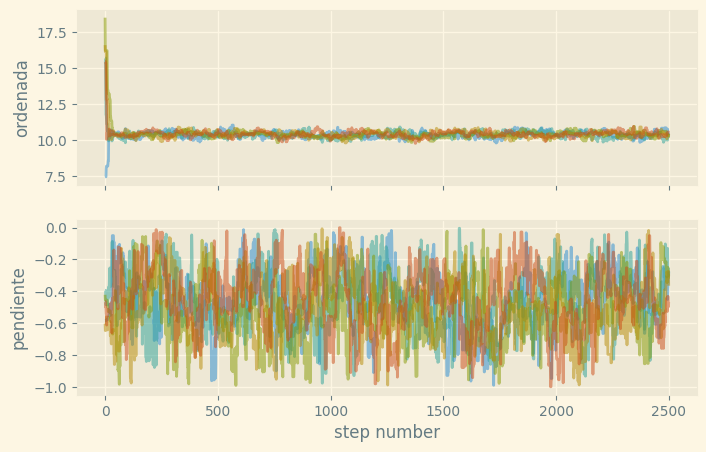

In [212]:
fig, axes = plt.subplots(2, figsize=(8, 5), sharex=True)
axes[0].plot(samples[:, :, 0], alpha=0.5)
axes[0].set_ylabel("ordenada")

axes[1].plot(samples[:, :, 1], alpha=0.5)
axes[1].set_ylabel("pendiente")

axes[1].set_xlabel("step number");

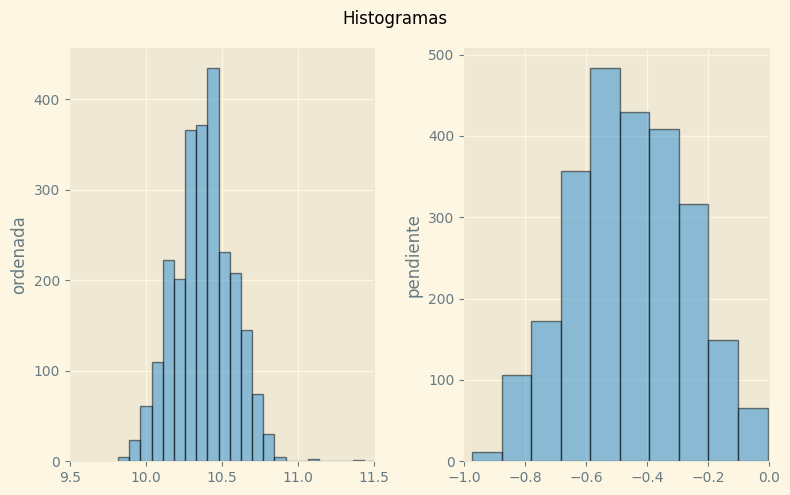

In [229]:
#Histogramas de el caminante 2
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

axes[0].hist(samples[:, 1, 0], bins=80, alpha=0.5, edgecolor="black")
axes[0].set_ylabel("ordenada")
axes[0].set_xlim(9.5, 11.5)

axes[1].hist(samples[:, 1, 1], alpha=0.5, edgecolor="black")
axes[1].set_ylabel("pendiente")
axes[1].set_xlim(-1, 0)

fig.suptitle("Histogramas")
plt.tight_layout()

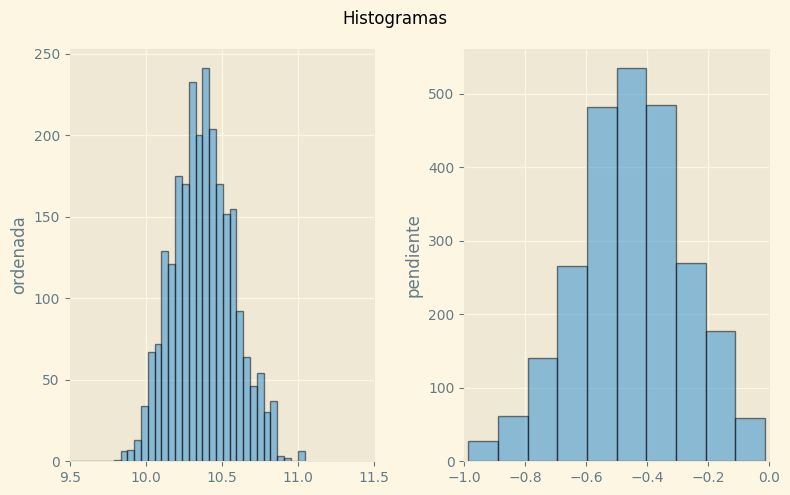

In [230]:
#Histogramas de el caminante 1
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

axes[0].hist(samples[:, 0, 0], bins=80, alpha=0.5, edgecolor="black")
axes[0].set_ylabel("ordenada")
axes[0].set_xlim(9.5, 11.5)

axes[1].hist(samples[:, 0, 1], alpha=0.5, edgecolor="black")
axes[1].set_ylabel("pendiente")
axes[1].set_xlim(-1, 0)

fig.suptitle("Histogramas")
plt.tight_layout()

In [231]:
prediccion = []
counts, bins = np.histogram(samples[:, 0, 0], bins=80)
mean_value = np.sum(bins[:-1] * counts) / np.sum(counts)
prediccion.append(mean_value)

counts, bins = np.histogram(samples[:, 0, 1], bins=80)
mean_value = np.sum(bins[:-1] * counts) / np.sum(counts)
prediccion.append(mean_value)

print("Predicción:", prediccion)

Predicción: [10.340116284360438, -0.4600645791640172]


Obtenemos la predicción del valor más común de la distribución como:  ordenada de 10.34011628436043 y pendiente de -0.4600645791640172

In [155]:
tau = sampler.get_autocorr_time()
print(tau)

[22.79297592 32.00010757]


Este es el número de pasos que se necesitan para que la cadena "olvide" donde inicio, es decir, al eliminar esa cantidad de pasos obtenemos una cadena que no tiene efectos de sus valores iniciales. Con esto podemos obtener las distribuciones alrededor de los puntos convergentes. Después eliminamos 100 valores de la cadena (burning) para que esto suceda.

# Graficando con corner

In [ ]:
!pip install corner==2.2.1

In [183]:
import corner

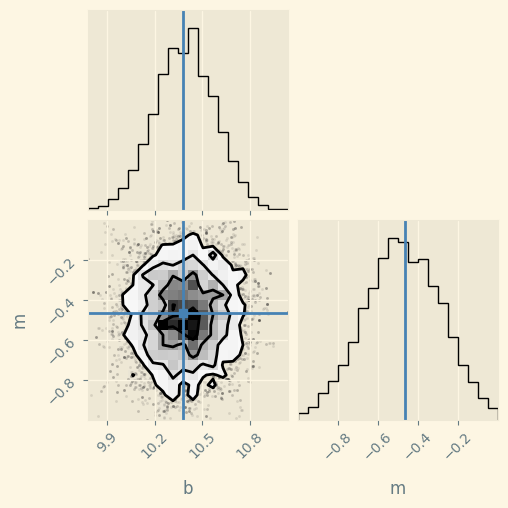

In [227]:
chain = sampler.get_chain(discard=100, thin=1, flat=True)
fig = corner.corner(chain, labels=labels, truths=[10.379, -0.462]);